# Problem
**add description**

---
### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization

> LinearRegression : Class is used for implementing linear regression models during machine learning tasks
> train_test_split : 
> mean_squared_error : asd

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

---

## Setup : Importing the Dataset

Dataset on Singapore Used Car Prices created in May 2021 : Attached file `SG_usedcar.csv`     

In [2]:
carData = pd.read_csv('SG_usedcar.csv')
carData = carData.drop(['Reg_date','Dep','Road Tax','Curb Weight','Manufactured','Transmission','ARF','Power','Engine Cap'],axis=1)

In [3]:
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price
0,BMW 5 Series 520i Highline,Luxury Sedan,1yr 11mths 21days COE left),N.A,38133,67304,41566,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,4yrs 4mths 7days COE left),50000,31237,56001,19775,2,49800
2,MINI One 1.6A (New 10-yr COE),Hatchback,10yrs COE left),110000,N.A,N.A,18180,3,62800
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,7yrs 8mths 5days COE left),N.A,N.A,25727,10763,3,N.A
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,1yr 6mths 21days COE left),203000,6656,21349,12154,2,12800


Let's list down all our observations from the super-quick glance of the dataset, as above.
* There are `7` variables/features/columns and `1000` observations/samples/rows in the dataset.    
* The response variable seems to be `Rating`, while the remaining 6 are most likely predictors.     
* There are `3` variables identified as `int64` by default, and it seems they are indeed Numeric.     
* There are `4` variables identified as `object` by default, and they are most likely Categorical.      
* None of the variables/features seem to have any missing value (have to check again, carefully).

## Setup: Cleaning the Dataset
Let us start by cleaning the dataset by:
- replacing the empty/NA values in the data set to nan 
- removing missing values
- filling the nan with 0
- extracting main brand names
- converting COE years+months to just months

In [4]:
#Change N.A to nan
carData = carData.replace('N.A',np.nan)
carData = carData.replace('N.A.',np.nan)
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4396 non-null   object
 1   Type           4396 non-null   object
 2   Coe_left       4388 non-null   object
 3   Mileage        2840 non-null   object
 4   Dereg Value    3446 non-null   object
 5   COE            4138 non-null   object
 6   OMV            3978 non-null   object
 7   No. of Owners  4339 non-null   object
 8   Price          3676 non-null   object
dtypes: object(9)
memory usage: 309.2+ KB


In [5]:
# get the number of missing data points per column
missing_values_count = carData.isnull().sum()
missing_values_count

Brand               0
Type                0
Coe_left            8
Mileage          1556
Dereg Value       950
COE               258
OMV               418
No. of Owners      57
Price             720
dtype: int64

In [6]:
#Removing missing values
carData.dropna(subset=['Brand','Type','Coe_left','Mileage','Dereg Value','No. of Owners','OMV','COE','Price'], inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2529 non-null   object
 1   Type           2529 non-null   object
 2   Coe_left       2529 non-null   object
 3   Mileage        2529 non-null   object
 4   Dereg Value    2529 non-null   object
 5   COE            2529 non-null   object
 6   OMV            2529 non-null   object
 7   No. of Owners  2529 non-null   object
 8   Price          2529 non-null   object
dtypes: object(9)
memory usage: 197.6+ KB


In [7]:
carData.fillna(0, inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2529 non-null   object
 1   Type           2529 non-null   object
 2   Coe_left       2529 non-null   object
 3   Mileage        2529 non-null   object
 4   Dereg Value    2529 non-null   object
 5   COE            2529 non-null   object
 6   OMV            2529 non-null   object
 7   No. of Owners  2529 non-null   object
 8   Price          2529 non-null   object
dtypes: object(9)
memory usage: 197.6+ KB


In [8]:
for i,v in enumerate(carData.Brand):
    wordstr = v.split()
    carData['Brand'].loc[i] = str(wordstr[0]) 
    
# Function to extract main brand
def extract_main_brand(brand):
    if isinstance(brand, str):
        return brand.split()[0]
    else:
        return np.nan

# Extract main brands from the 'Brand' column
carData['Brand'] = carData['Brand'].apply(extract_main_brand)

# Display the modified DataFrame
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price
1,Suzuki,SUV,4yrs 4mths 7days COE left),50000,31237,56001,19775,2,49800
4,Kia,Hatchback,1yr 6mths 21days COE left),203000,6656,21349,12154,2,12800
5,BMW,Sports Car,6yrs 1mth 12days COE left),21000,106829,50110,71979,1,259988
13,Honda,Mid-Sized Sedan,3yrs 5mths 7days COE left),35000,31339,64900,13856,1,44800
15,BMW,Mid-Sized Sedan,8yrs 27days COE left),21200,38416,30009,18894,1,85800


In [9]:
carData['Brand'].value_counts()

Brand
Mercedes-Benz    423
Honda            355
Toyota           342
BMW              273
Mazda            126
Volkswagen       116
Audi             112
Nissan           107
Mitsubishi        94
Hyundai           88
Kia               62
Subaru            60
Porsche           56
Lexus             52
MINI              37
Volvo             37
Suzuki            34
Chevrolet         15
Peugeot           13
Opel              13
Skoda             12
SEAT              12
McLaren           12
Bentley           12
Land              11
Ford               9
Ferrari            9
Lamborghini        7
Infiniti           6
Maserati           4
Citroen            3
Proton             3
Rolls-Royce        2
Renault            2
Perodua            2
Jaguar             2
Cadillac           2
Hummer             1
Aston              1
Daihatsu           1
Alfa               1
Name: count, dtype: int64

In [10]:
# Function to convert COE left to months
def coe_to_months(coe):
    if isinstance(coe, str):
        coe_parts = coe.split()
        total_months = 0
        for part in coe_parts:
            if 'yr' in part or 'yrs' in part:
                total_months += int(part.strip('yrs').strip('yr')) * 12
            elif 'mth' in part or 'mths' in part:
                total_months += int(part.strip('mths').strip('mth'))
        return total_months
    else:
        return np.nan

# Convert 'Coe_left' to months
carData['Coe_left'] = carData['Coe_left'].apply(coe_to_months)

# Display the modified DataFrame
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price
1,Suzuki,SUV,52,50000,31237,56001,19775,2,49800
4,Kia,Hatchback,18,203000,6656,21349,12154,2,12800
5,BMW,Sports Car,73,21000,106829,50110,71979,1,259988
13,Honda,Mid-Sized Sedan,41,35000,31339,64900,13856,1,44800
15,BMW,Mid-Sized Sedan,96,21200,38416,30009,18894,1,85800


In [11]:
# create a list of fields to be converted to int
convert_dict = {'Mileage': 'int64','No. of Owners': 'int64','Price': 'int64',
                'Dereg Value':'int64','Type':'category'}
carData = carData.astype(convert_dict)
carData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          2529 non-null   object  
 1   Type           2529 non-null   category
 2   Coe_left       2529 non-null   int64   
 3   Mileage        2529 non-null   int64   
 4   Dereg Value    2529 non-null   int64   
 5   COE            2529 non-null   object  
 6   OMV            2529 non-null   object  
 7   No. of Owners  2529 non-null   int64   
 8   Price          2529 non-null   int64   
dtypes: category(1), int64(5), object(3)
memory usage: 245.2+ KB


In [12]:
convert_dict = {'Mileage': 'int64','COE': 'int64','OMV': 'int64', 'No. of Owners': 'int64','Price': 'int64','Dereg Value':'int64','Type':'category'}

In [13]:
carData = carData.astype(convert_dict)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          2529 non-null   object  
 1   Type           2529 non-null   category
 2   Coe_left       2529 non-null   int64   
 3   Mileage        2529 non-null   int64   
 4   Dereg Value    2529 non-null   int64   
 5   COE            2529 non-null   int64   
 6   OMV            2529 non-null   int64   
 7   No. of Owners  2529 non-null   int64   
 8   Price          2529 non-null   int64   
dtypes: category(1), int64(7), object(1)
memory usage: 245.2+ KB


---
## Exploratory Data Analysis
Let us explore the different data and variables that we have like `'Brand','Type','Coe_left','Mileage','Dereg Value','No. of Owners','OMV','COE'` and the response variable `Price`, the one we want to predict at the end of the day.


In [14]:
carDF=pd.DataFrame(carData[['Brand','Type','Coe_left']])

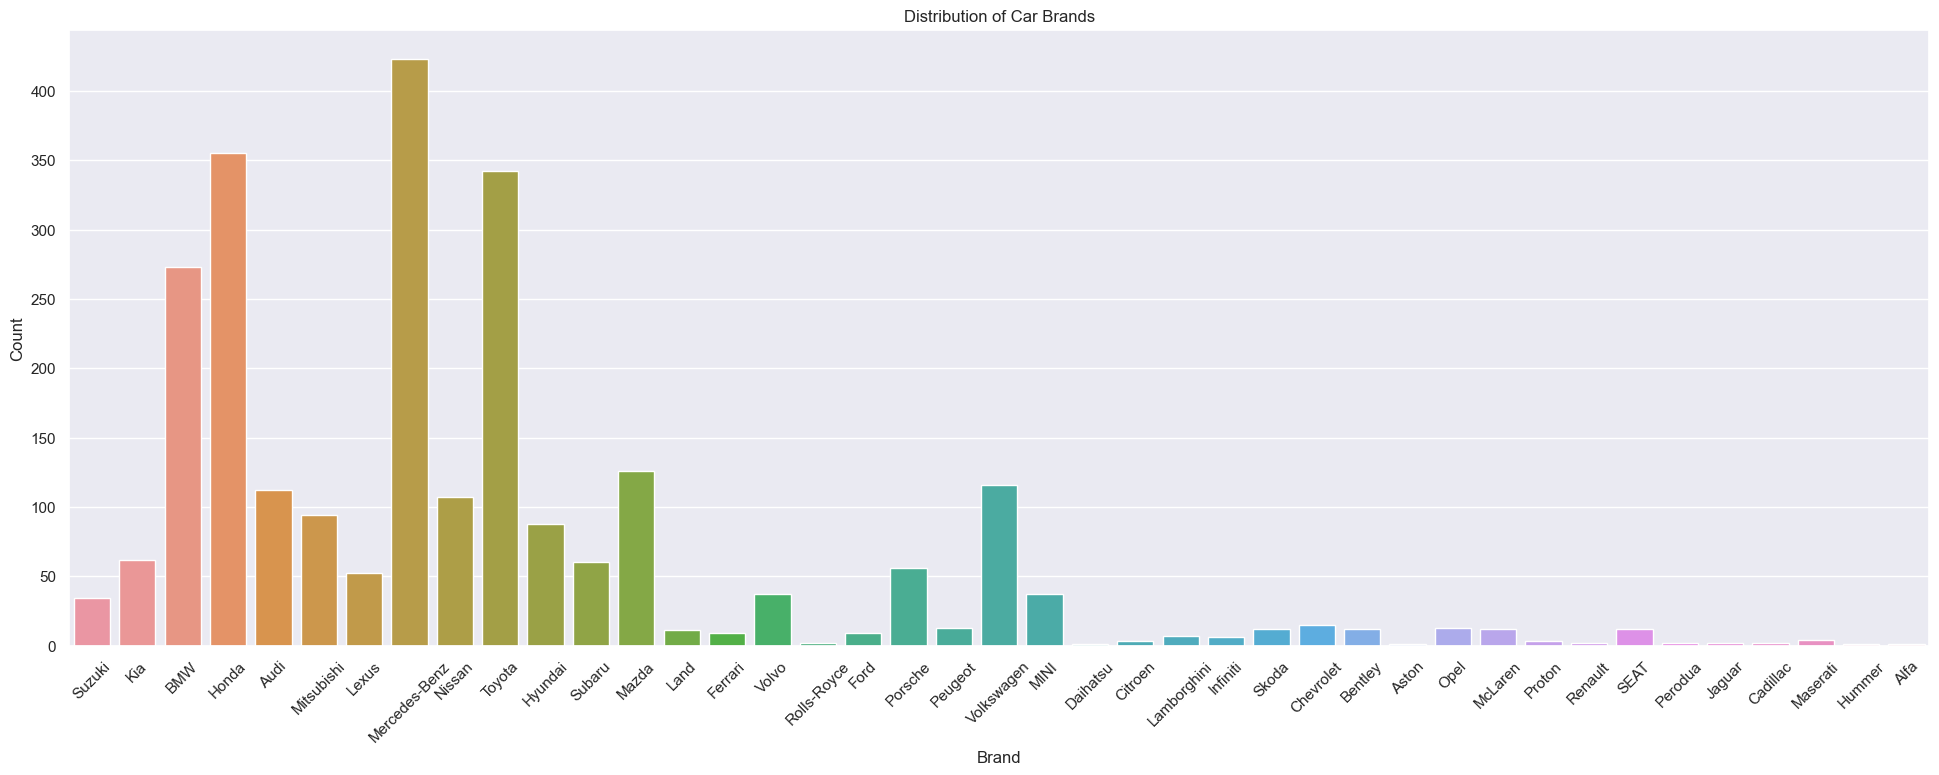

In [15]:
plt.figure(figsize=(24, 8))
sb.countplot(x='Brand', data=carDF)
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*What can you observe from the distribution of Brand?* 
- The top 3 brands in descending order in count are Mercedes-Benz, Honda and Toyota.

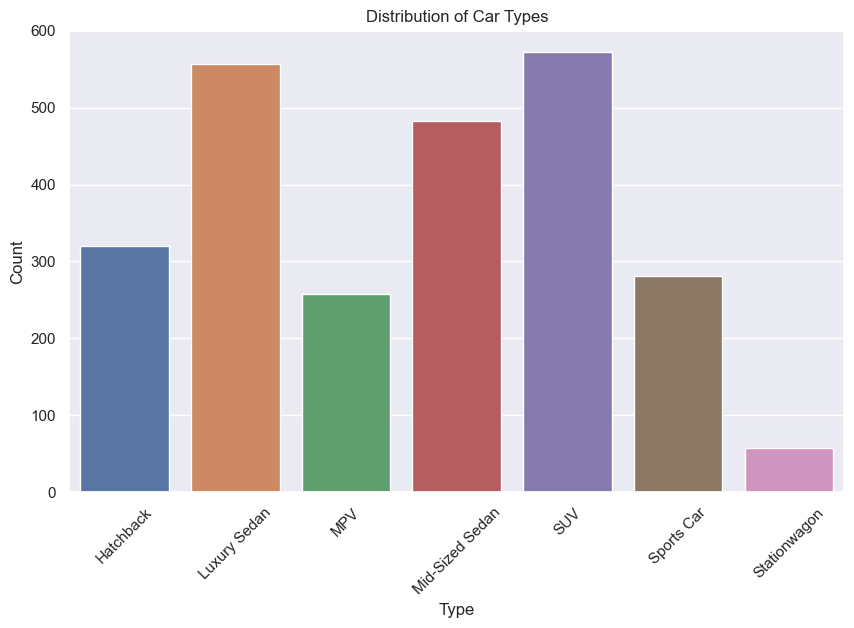

In [16]:
plt.figure(figsize=(10, 6))
sb.countplot(x='Type', data=carDF)
plt.title('Distribution of Car Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*What can you observe from the distribution of Car Types?* 
- The top 3 car types in descending order are SUV, Luxury Sedan and Mid-Sized Sedan.


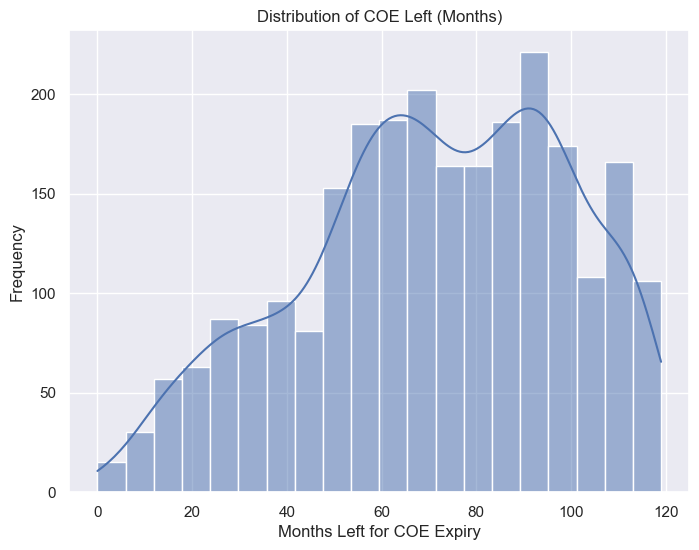

In [17]:
plt.figure(figsize=(8, 6))
sb.histplot(carDF['Coe_left'], bins=20, kde=True)
plt.title('Distribution of COE Left (Months)')
plt.xlabel('Months Left for COE Expiry')
plt.ylabel('Frequency')
plt.show()


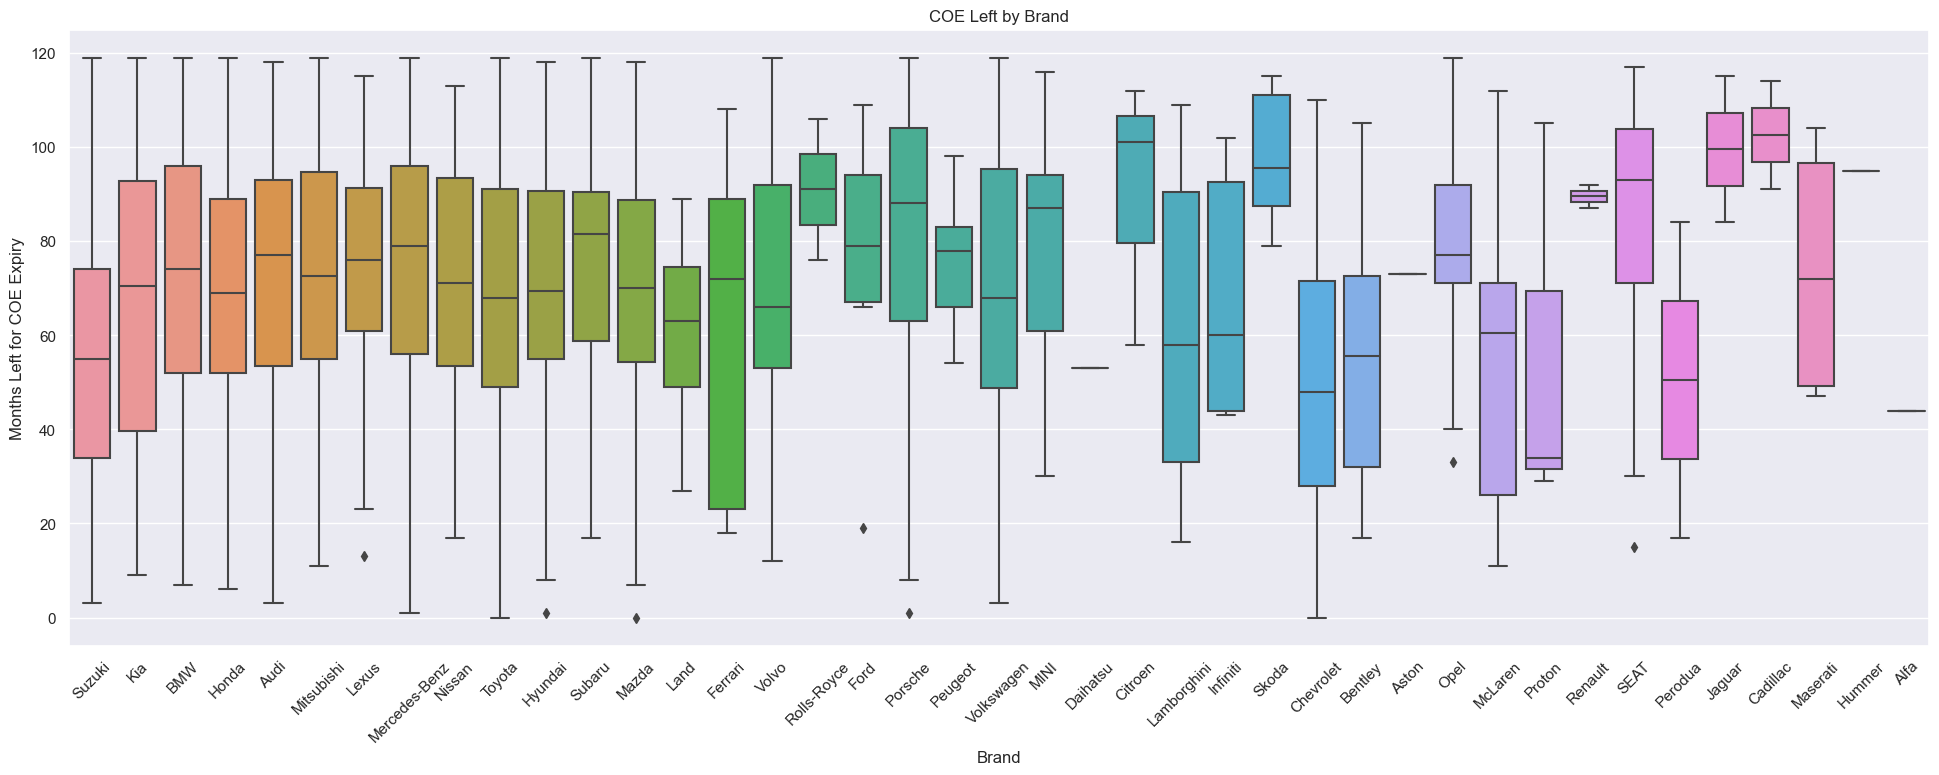

In [18]:
plt.figure(figsize=(24, 8))
sb.boxplot(x='Brand', y='Coe_left', data=carDF)
plt.title('COE Left by Brand')
plt.xlabel('Brand')
plt.ylabel('Months Left for COE Expiry')
plt.xticks(rotation=45)
plt.show()


In [19]:
carDF['Coe_left'].describe()

count    2529.000000
mean       71.064848
std        28.110101
min         0.000000
25%        53.000000
50%        72.000000
75%        94.000000
max       119.000000
Name: Coe_left, dtype: float64

*What can you observe from the distribution of COE?* 
- Most cars are left with 85-90 months of COE left
- The mean number of COE left is around 71 months
- Min is 0 and max is 119 months.

In [20]:
mileage = pd.DataFrame(carData['Mileage'])
dereg = pd.DataFrame(carData['Dereg Value'])
price = pd.DataFrame(carData['Price'])


<Axes: >

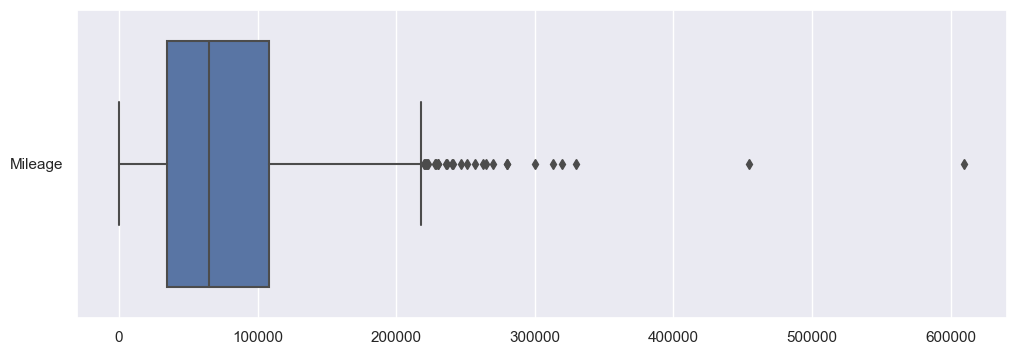

In [21]:
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = mileage, orient = "h")

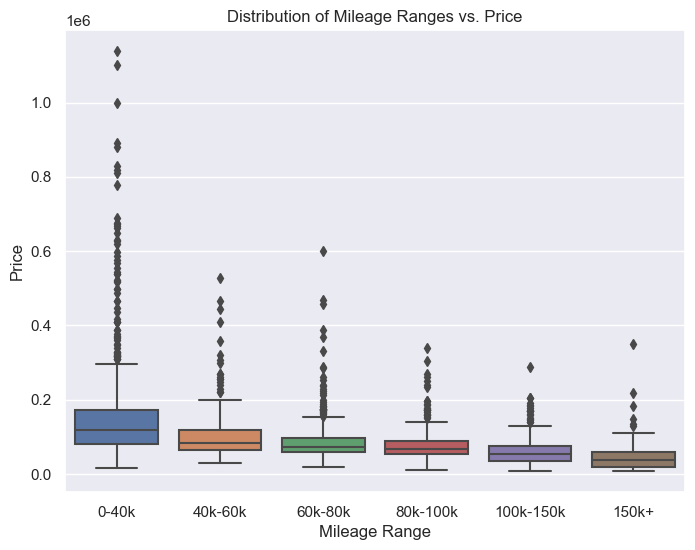

In [22]:
# Define the mileage ranges
mileage_bins = [0, 40000, 60000, 80000, 100000, 150000, float('inf')]
mileage_labels = ['0-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k+']

# Create a new column in the DataFrame with mileage ranges
carData['Mileage Range'] = pd.cut(carData['Mileage'], bins=mileage_bins, labels=mileage_labels)

# Plot the boxplot
plt.figure(figsize=(8, 6))
sb.boxplot(x='Mileage Range', y='Price', data=carData)
plt.title('Distribution of Mileage Ranges vs. Price')
plt.xlabel('Mileage Range')
plt.ylabel('Price')
plt.show()

*What can you observe from the distribution of Mileage & its Range?* 
- The lower the mileage, the car price increases.
- Most cars are below 100k mileage.

<Axes: >

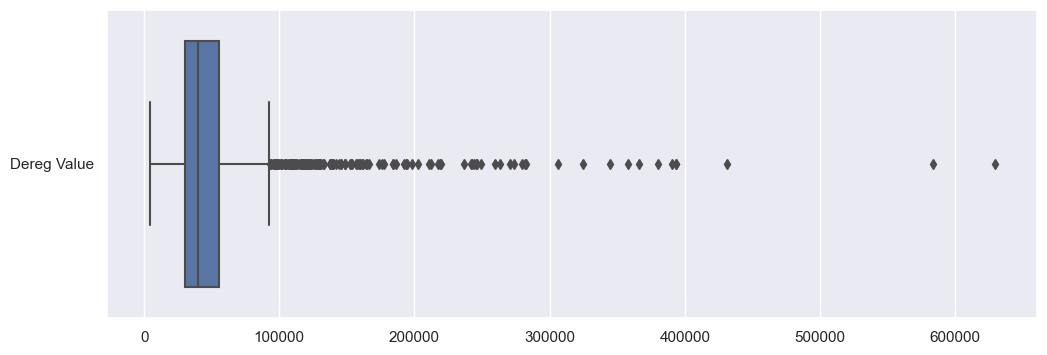

In [23]:
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = dereg, orient = "h")

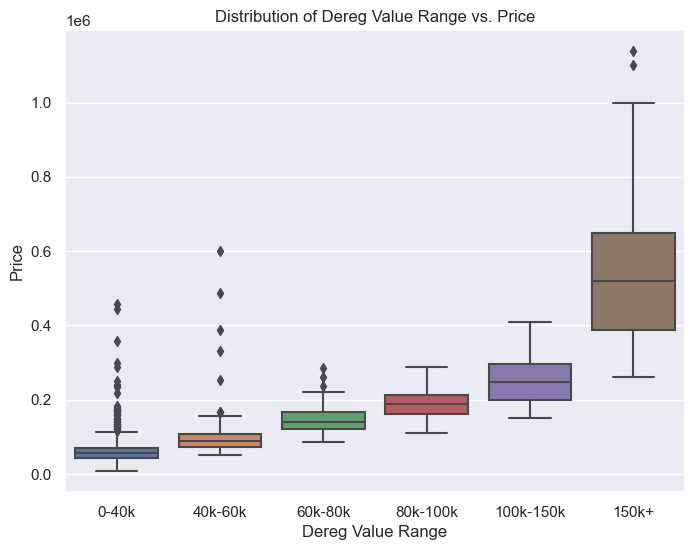

In [24]:
# Define the Dereg Value ranges
dereg_bins = [0, 40000, 60000, 80000, 100000, 150000, float('inf')]
dereg_labels = ['0-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k+']

# Create a new column in the DataFrame with Dereg ranges
carData['Dereg Value Range'] = pd.cut(carData['Dereg Value'], bins=dereg_bins, labels=dereg_labels)

# Plot the boxplot
plt.figure(figsize=(8, 6))
sb.boxplot(x='Dereg Value Range', y='Price', data=carData)
plt.title('Distribution of Dereg Value Range vs. Price')
plt.xlabel('Dereg Value Range')
plt.ylabel('Price')
plt.show()

In [25]:
dereg.describe()

,Dereg Value
count,2529.000000
mean,48238.306841
std,41044.042056
min,4036.000000
25%,30400.000000
50%,39609.000000
75%,55418.000000
max,629526.000000


*What can you observe from the distribution of Dereg Value?* 
- The mean of the dereg value is around 48238 and the max is 629526 while the lowest is 4036.

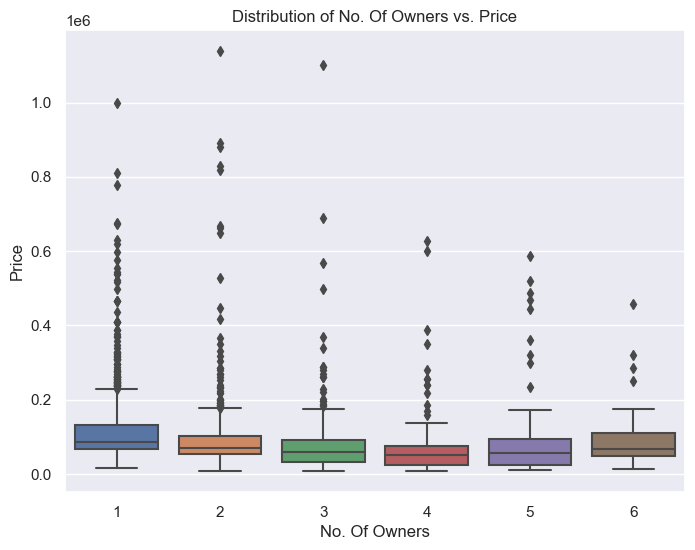

In [26]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='No. of Owners', y='Price', data=carData)
plt.title('Distribution of No. Of Owners vs. Price')
plt.xlabel('No. Of Owners')
plt.ylabel('Price')
plt.show()

*What can you observe from the distribution of No. Of Owners?* 
- Generally as the no. of owners increases, the car price decreases.

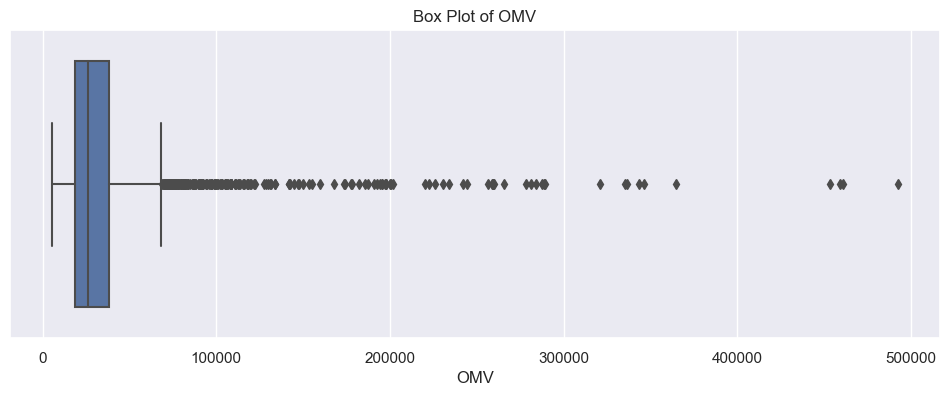

In [27]:
# Plotting the boxplot for the 'OMV' column
plt.figure(figsize=(12, 4))
sb.boxplot(x=carData['OMV'], orient="h")
plt.title('Box Plot of OMV')
plt.xlabel('OMV')
plt.show()


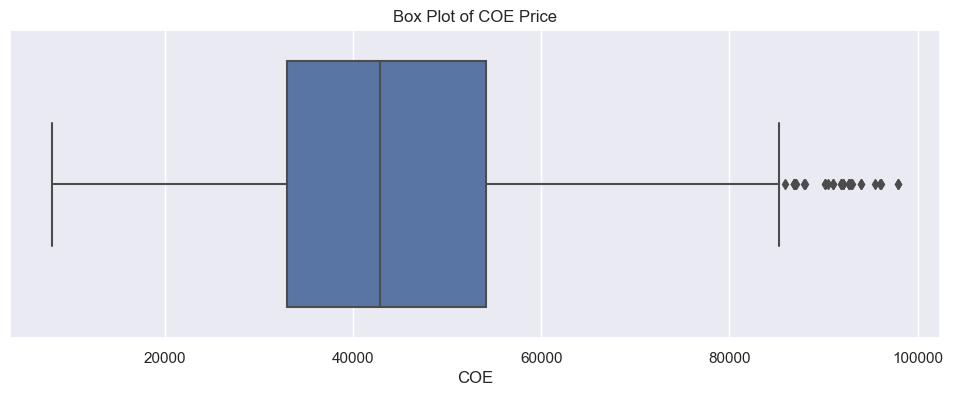

In [28]:
# Plotting the boxplot for the 'COE' column
plt.figure(figsize=(12, 4))
sb.boxplot(x=carData['COE'], orient="h")
plt.title('Box Plot of COE Price')
plt.xlabel('COE')
plt.show()


<Axes: >

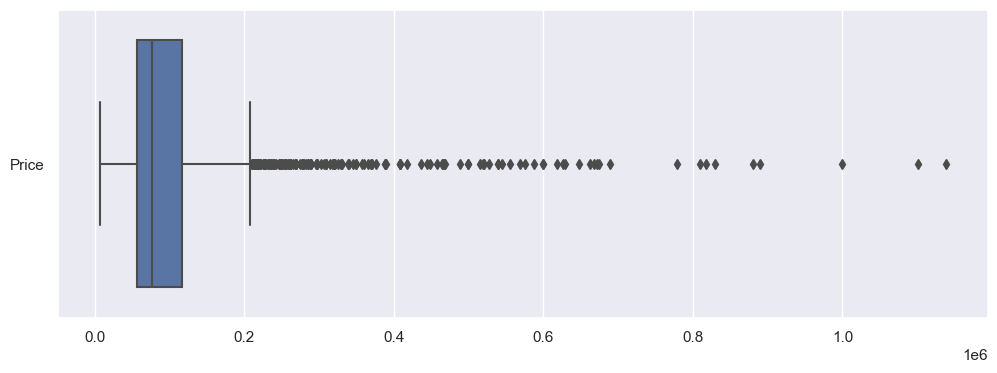

In [29]:
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = price, orient = "h")

## Linear Regression

In [30]:
brand_dummies = pd.get_dummies(carData['Brand'], prefix='Brand')
type_dummies = pd.get_dummies(carData['Type'], prefix='Type')

X = pd.concat([brand_dummies, type_dummies, carData[['Coe_left', 'Mileage', 'Dereg Value', 'No. of Owners', 'OMV', 'COE']]], axis=1)
y = carData['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
coefficients_df = pd.DataFrame({'Predictors': X_train.columns, 'Coefficients': linreg.coef_[0]})
print(coefficients_df)

Intercept of Regression 	: b =  1458688853795.3682
Coefficients of Regression 	: a =  [-1.45868886e+12 -1.45868884e+12 -1.45868884e+12 -1.45868884e+12
 -1.45868888e+12 -1.45868879e+12 -1.45868883e+12 -1.45868884e+12
 -1.45868885e+12 -1.45868880e+12 -1.45868884e+12 -1.45868884e+12
 -1.45868881e+12 -1.45868884e+12 -1.45868884e+12 -1.45868886e+12
 -1.45868884e+12 -1.45868886e+12 -1.45868884e+12 -1.45868884e+12
 -1.45868883e+12 -1.45868884e+12 -1.45868884e+12 -1.45868885e+12
 -1.45868884e+12 -1.45868884e+12 -1.45868884e+12 -1.45868884e+12
 -1.45868885e+12 -1.45868885e+12 -1.45868883e+12 -1.45868883e+12
  3.05175781e-05 -1.45868881e+12 -1.45868884e+12 -1.45868884e+12
 -1.45868883e+12 -1.45868884e+12 -1.45868884e+12 -1.45868884e+12
 -1.45868884e+12 -8.33595703e+02 -5.62491504e+03 -3.02094226e+03
 -5.15191724e+03  2.24447137e+03  1.59254878e+04 -3.53978516e+03
  4.02370361e+02 -1.13037109e-01  1.38629150e+00 -1.38804419e+03
  8.16650391e-01 -5.94238281e-01]

              Predictors  Coeffici

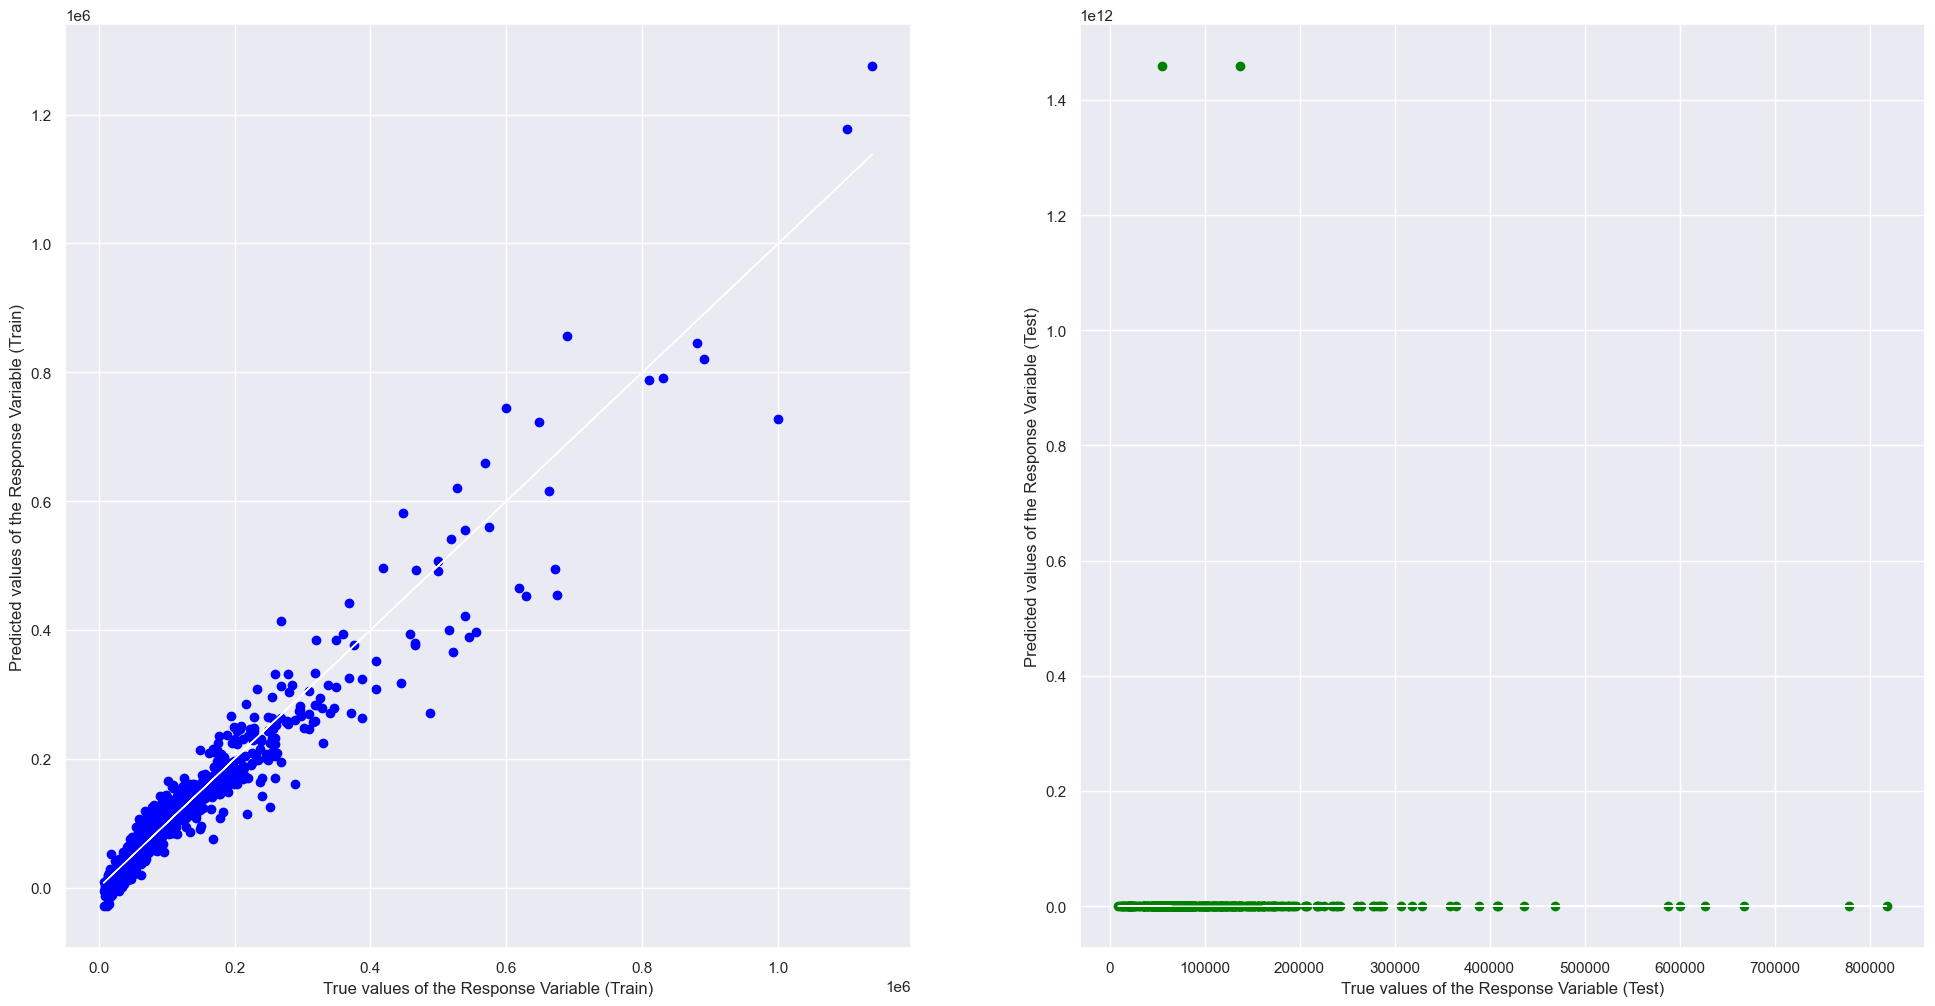

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9336472159077528
Mean Squared Error (MSE) 	: 593131224.3010948

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -1009247138218.4553
Mean Squared Error (MSE) 	: 8.410170540312016e+21



In [32]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Lasso Regression

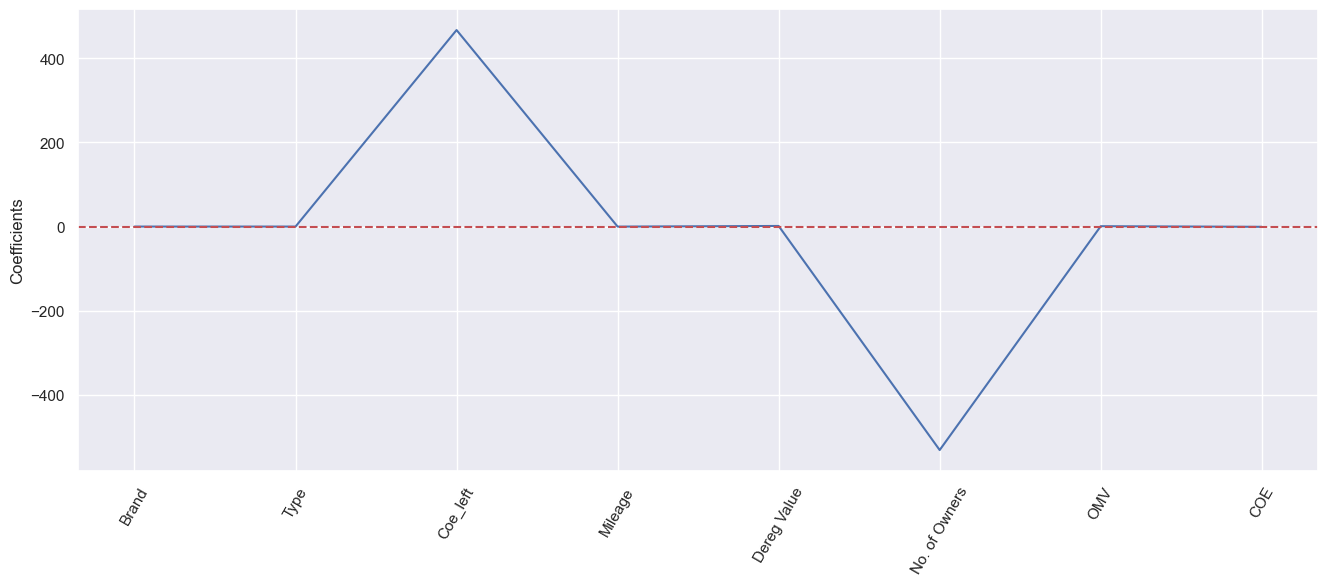

In [33]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

# Dummy variables for Brand and Type
brand_dummies = pd.get_dummies(carData['Brand'], prefix='Brand')
type_dummies = pd.get_dummies(carData['Type'], prefix='Type')

# Grouping all instances of the same brand together
brand_grouped = brand_dummies.groupby(brand_dummies.columns.str.split('_').str[0], axis=1).sum()

# Grouping all instances of the same type together
type_grouped = type_dummies.groupby(type_dummies.columns.str.split('_').str[0], axis=1).sum()

# Concatenate the grouped data with other features
X = pd.concat([brand_grouped, type_grouped, carData[['Coe_left', 'Mileage', 'Dereg Value', 'No. of Owners', 'OMV', 'COE']]], axis=1)

# Perform first split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Perform the second split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=100)

from sklearn.preprocessing import MinMaxScaler

# Create the scaler with object range of 0-1
scaler = MinMaxScaler()

# Fit and transform using the training data
scaler.fit_transform(X_train)

# Transform the validation and test features
scaler.transform(X_valid)
scaler.transform(X_test)

# Create the model
lasso = Lasso(alpha=10.0, max_iter=10000)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Extract the coefficients
lasso_coef = lasso.coef_

# Plot the coefficients
plt.figure(figsize=(16, 6))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')
plt.show()


The Lasso Regression algorithm has reduced the coefficients of brand, type, mileage, dereg_value, OMV and COE to close to zero, deeming them less important than the other two features. This comes in handy as we would face major multicollinearity issues if we included all of the features in our models.

## Evaluate Model Performance

In [34]:
from sklearn.metrics import mean_absolute_error

# Check the columns in X_train_temp to verify column names
print(X_train_temp.columns)

# Define columns to drop
cols_to_drop = ['Brand', 'Type', 'Mileage', 'Dereg Value', 'OMV', 'COE']

Index(['Brand', 'Type', 'Coe_left', 'Mileage', 'Dereg Value', 'No. of Owners',
       'OMV', 'COE'],
      dtype='object')


In [35]:
# Drop columns from training, validation, and test data
X_train_temp = X_train_temp.drop(columns=cols_to_drop, errors='ignore')
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_valid = X_valid.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')


In [36]:
# Create regressor
regressor = LinearRegression()

# Fit MLR model to training data
mlr = regressor.fit(X_train, y_train)

In [37]:
# Define a function for scoring
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}'.format(mae))
    print('Mean Squared Error: {:0.4f}'.format(mse))
    print('R^2 Score: {:0.4f}'.format(r2))

In [38]:
# Evaluate the performance
scoring(mlr, X_valid, y_valid)

Model Performance
Mean Absolute Error: 51366.6953
Mean Squared Error: 10956953221.1402
R^2 Score: 0.0705


MAE of approximately 51366.6953 suggests that, on average, the model's predictions are off by around $51366.70. Whether this is reasonable depends on the scale of your target variable. For example, if your target variable represents the price of used cars, an MAE of this magnitude might be acceptable, considering that car prices can vary widely.

An MSE of approximately 10956953221.1402 indicates that the average squared difference between the predicted and actual values is around $10,956,953,221.14. MSE is highly sensitive to outliers, as it squares the errors.

R^2 score of approximately 0.0705 indicates that the model explains around 7.05% of the variance in the target variable. In other words, the model's predictions are not able to capture much of the variability present in the actual target values.

## Random Forest

In [39]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
carData_cat = carData[['Brand','Type']]
ohe.fit(carData_cat)
carData_cat_ohe = pd.DataFrame(ohe.transform(carData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(carData_cat.columns))

# Check the encoded variables
carData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand_Alfa            2529 non-null   float64
 1   Brand_Aston           2529 non-null   float64
 2   Brand_Audi            2529 non-null   float64
 3   Brand_BMW             2529 non-null   float64
 4   Brand_Bentley         2529 non-null   float64
 5   Brand_Cadillac        2529 non-null   float64
 6   Brand_Chevrolet       2529 non-null   float64
 7   Brand_Citroen         2529 non-null   float64
 8   Brand_Daihatsu        2529 non-null   float64
 9   Brand_Ferrari         2529 non-null   float64
 10  Brand_Ford            2529 non-null   float64
 11  Brand_Honda           2529 non-null   float64
 12  Brand_Hummer          2529 non-null   float64
 13  Brand_Hyundai         2529 non-null   float64
 14  Brand_Infiniti        2529 non-null   float64
 15  Brand_Jaguar         

In [40]:
# Combining Numeric features with the OHE Categorical features
carData_num = carData[['Coe_left','Mileage','Dereg Value','COE','OMV', 'No. of Owners','Price']]
carData_res = carData['Price']

# Reset index for all DataFrames
carData_num.reset_index(drop=True, inplace=True)
carData_cat_ohe.reset_index(drop=True, inplace=True)
carData_res.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
carData_ohe = pd.concat([carData_num, carData_cat_ohe, carData_res], axis=1)

# Check the final dataframe
carData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Coe_left              2529 non-null   int64  
 1   Mileage               2529 non-null   int64  
 2   Dereg Value           2529 non-null   int64  
 3   COE                   2529 non-null   int64  
 4   OMV                   2529 non-null   int64  
 5   No. of Owners         2529 non-null   int64  
 6   Price                 2529 non-null   int64  
 7   Brand_Alfa            2529 non-null   float64
 8   Brand_Aston           2529 non-null   float64
 9   Brand_Audi            2529 non-null   float64
 10  Brand_BMW             2529 non-null   float64
 11  Brand_Bentley         2529 non-null   float64
 12  Brand_Cadillac        2529 non-null   float64
 13  Brand_Chevrolet       2529 non-null   float64
 14  Brand_Citroen         2529 non-null   float64
 15  Brand_Daihatsu       

In [41]:
# Extract Response and Predictors
y = pd.DataFrame(carData_ohe['Price'])
X = pd.DataFrame(carData_ohe.drop('Price', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [42]:
# Create the Random Forest object
rforest = RandomForestRegressor(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree
rforest.fit(X_train, y_train)

RandomForestRegressor(max_depth=4)

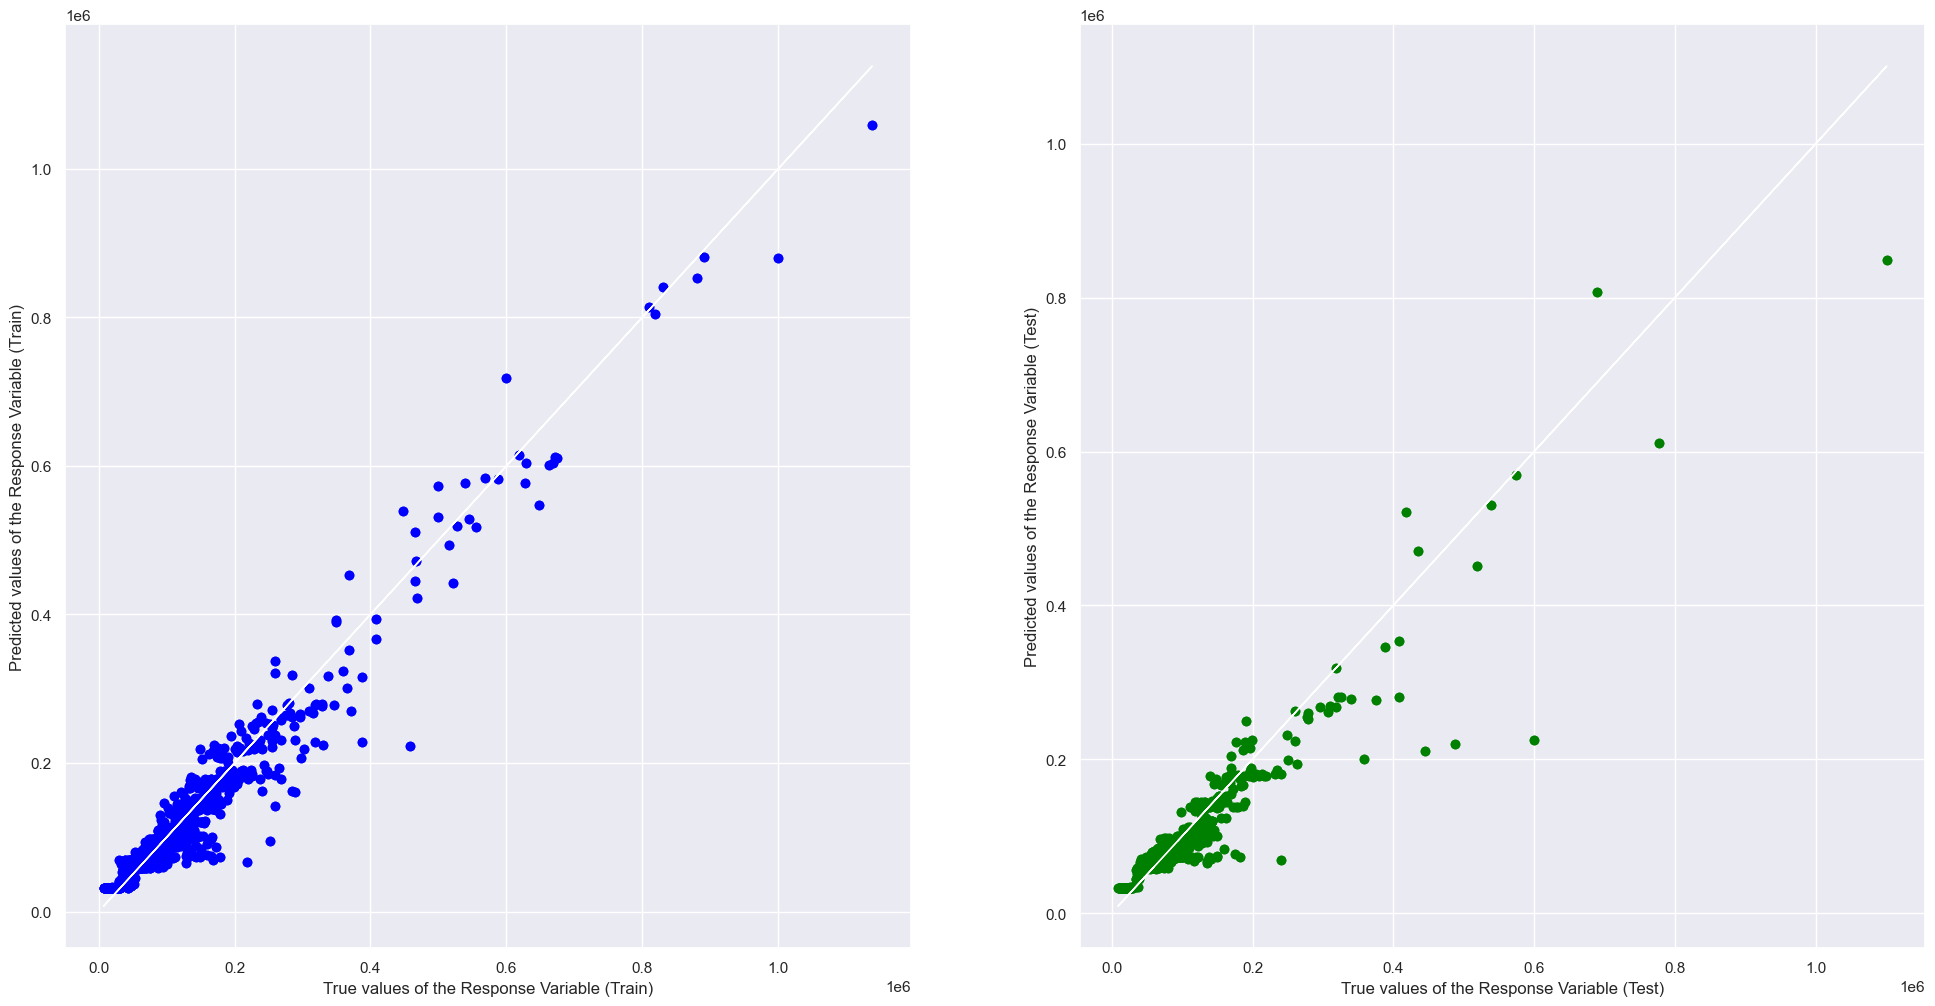

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9455144599271065
Mean Squared Error (MSE) 	: 482037601.7145997

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8693781939348204
Mean Squared Error (MSE) 	: 1140413921.4340045


In [43]:
# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color="blue")
axes[0].plot(y_train, y_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color="green")
axes[1].plot(y_test, y_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rforest.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rforest.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))


Overfitted as MSE on test data is much higher.

In [44]:
# Calculate z-scores for each feature
z_scores = np.abs(stats.zscore(X))

# Define a threshold for outlier removal (e.g., z-score > 3)
threshold = 3

# Filter out data points with z-scores above the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers from X and y
clean_X = X.drop(X.index[outlier_indices])
clean_y = y.drop(y.index[outlier_indices])

# Continue with model training using clean_X and clean_y


In [45]:
# Split the Dataset into Train and Test
clean_X_train, clean_X_test, clean_y_train, clean_y_test = train_test_split(clean_X, clean_y, test_size = 0.25)

In [46]:
# Create the Random Forest object
rforest2 = RandomForestRegressor(n_estimators = 50,  # n_estimators denote number of trees
                                 max_depth = 5)       # set the maximum depth of each tree
rforest2.fit(clean_X_train, clean_y_train)

RandomForestRegressor(max_depth=5, n_estimators=50)

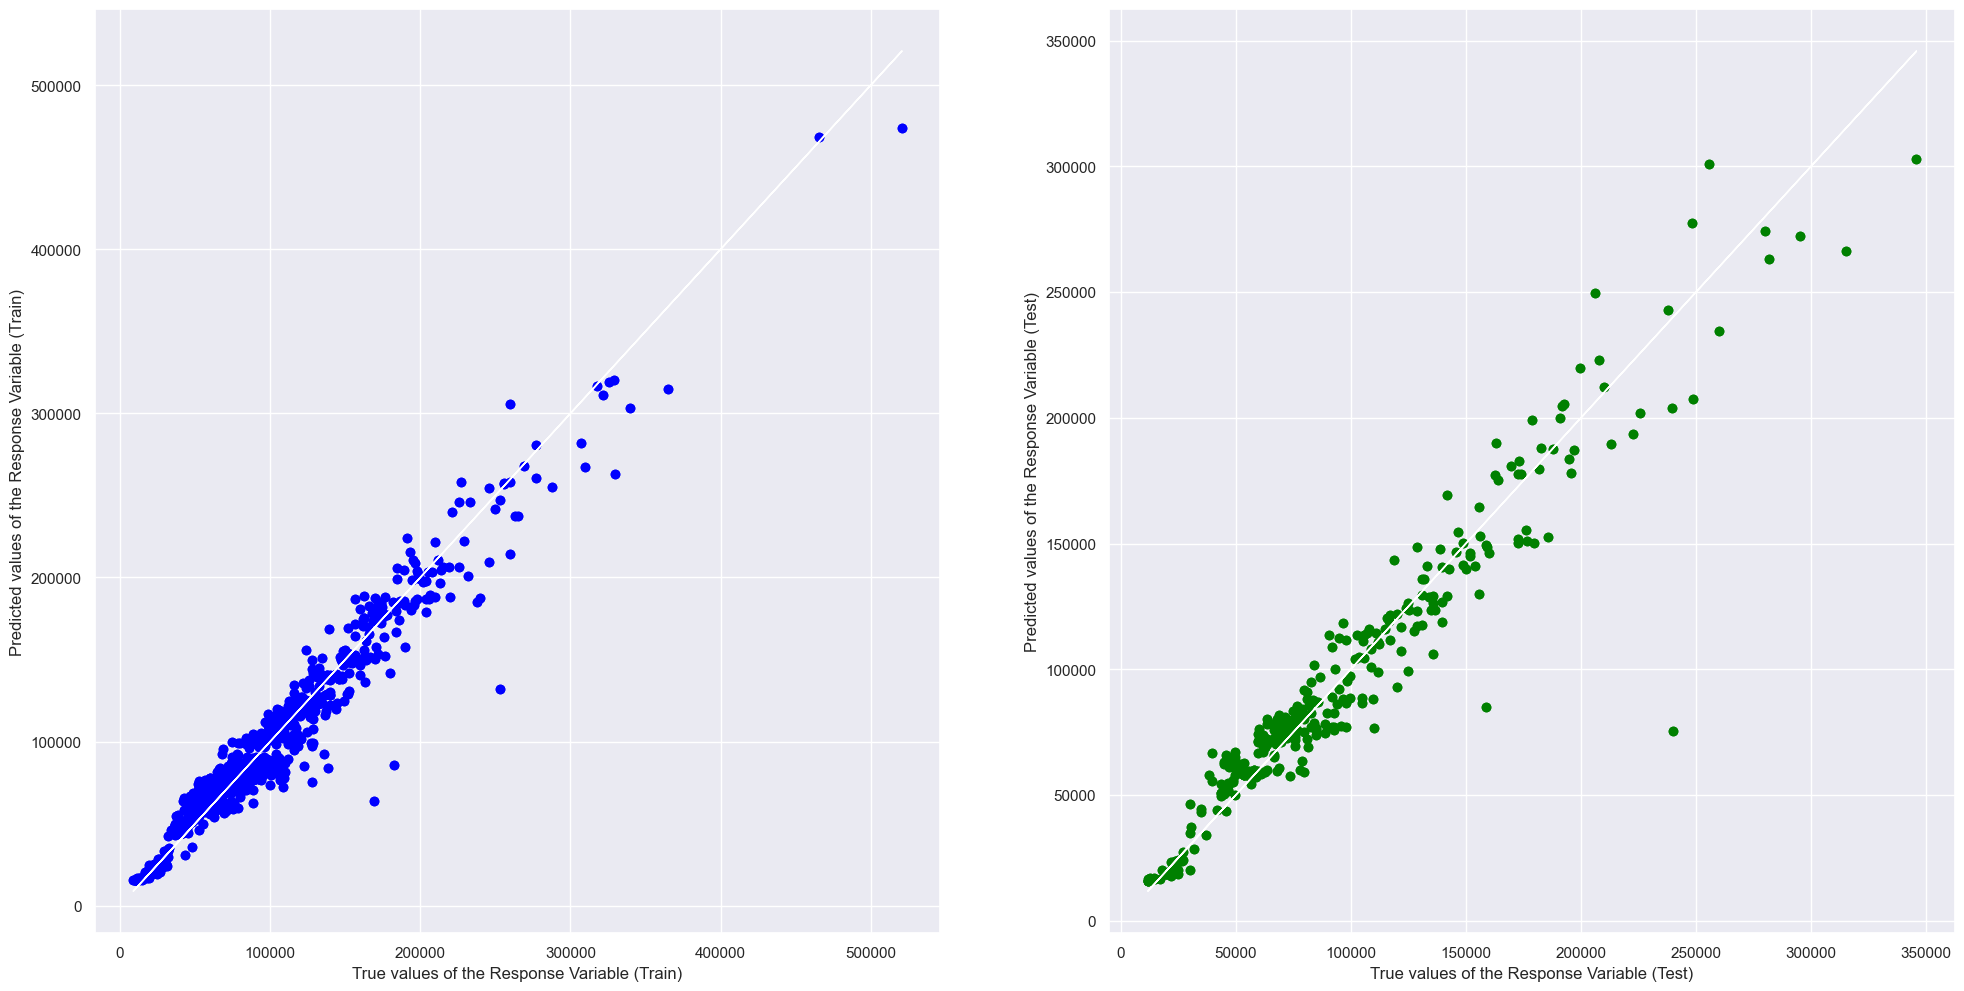

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9501621396742816
Mean Squared Error (MSE) 	: 172507647.0206676

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9244944176763294
Mean Squared Error (MSE) 	: 257327664.79706496


In [47]:
# Predict Response corresponding to Predictors
clean_y_train_pred = rforest2.predict(clean_X_train)
clean_y_test_pred = rforest2.predict(clean_X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(clean_y_train, clean_y_train_pred, color="blue")
axes[0].plot(clean_y_train, clean_y_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(clean_y_test, clean_y_test_pred, color="green")
axes[1].plot(clean_y_test, clean_y_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rforest2.score(clean_X_train, clean_y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(clean_y_train, clean_y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rforest2.score(clean_X_test, clean_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(clean_y_test, clean_y_test_pred))
